-------------------------------------------------------
# **Mobile_Internet_Case_Study**
-------------------------------------------------------
---------------------
## **Context**
---------------------

ExperienceMyServices reported that a typical American spends an **average of 144 minutes (2.4 hours)** per day accessing the Internet via a mobile device with a **standard deviation of 110 minutes**.

To test the validity of this statement, you collected **30 samples** from friends and family. The results for the time spent per day accessing the Internet via a mobile device (**in minutes**) are stored in "InternetMobileTime.csv".

--------------------------
## **Key Question**
--------------------------

Is there enough statistical evidence to conclude that the population mean time spent per day accessing the Internet via mobile device is different from 144 minutes? Use the p-value approach and a level of significance of 0.05.

**Note:** We can assume that the samples are randomly selected, independent, and come from a normally distributed population.

In [1]:
# Import the important packages
import pandas as pd  # Library used for data manipulation and analysis
import numpy as np  # Library used for working with arrays
import matplotlib.pyplot as plt  # Library for visualization
import seaborn as sns  # Library for visualization
import matplotlib.patheffects as path_effects

%matplotlib inline

import scipy.stats as stats  # library of statistical functions

In [2]:
# Reading the data
df = pd.read_csv('data/InternetMobileTime.csv')
df.mean()

Minutes    180.466667
dtype: float64

The estimated mean is 180.47
The estimated standard deviation is 141.52


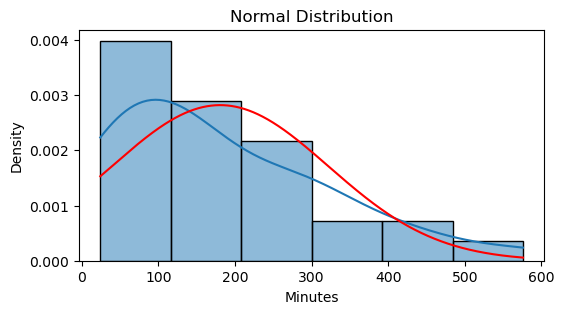

In [3]:
# Getting the mean and std of the data
mean = df.Minutes.mean()
std = df.Minutes.std()
print("The estimated mean is", round(mean, 2))
print("The estimated standard deviation is", round(std, 2))

# Creating a normal distribution with the mean and std
normal = stats.norm(mean, std)
density = pd.DataFrame() 
density["x"] = np.linspace(df.Minutes.min(), df.Minutes.max(), 100000) 
density["pdf"] = normal.pdf(density["x"])

# plot the distribution of data using histogram
fig, ax = plt.subplots(figsize = (6, 3)) 
sns.histplot(df.Minutes, ax=ax, kde=True, stat="density") # data
ax.plot(density.x, density.pdf, color="red") # normal distribution
plt.title("Normal Distribution") 
plt.show() 

## **Steps of Hypothesis Testing Assuming Normal Distribution**

### **Step 1: Define the null and the alternate hypotheses**

$$ H_o: \mu = 144 $$
$$ H_a: \mu \neq 144 $$

### **Step 2: Decide the significance level**

In [4]:
alpha = 0.05 # significance level

### **Step 3: Identify the test statistic**

In [5]:
n = 30 # sample size
mu = 144
sigma = 110
x_bar = df.Minutes.mean()

# We assume that the population is normally distributed and 
# the population standard deviation is known to be equal to 110. 
# So, we can use the Z-test statistic.

test_stat = (x_bar - mu) / (sigma/np.sqrt(n))
test_stat

1.8157832663959144

### **Step 4: Calculate the p-value using z-statistic**


Critical values: 1.9600, -1.9600



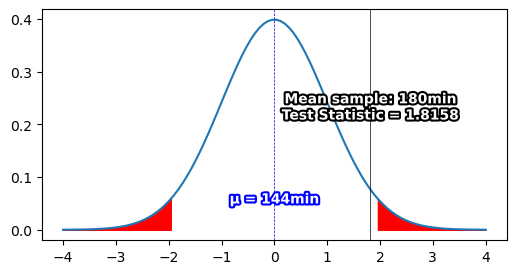

In [6]:
# plotting the test statistic distribution along with computed test statistic
# We are plotting the distributions here to better visualize the calculations

# find the critical values
critical_val1 = stats.norm.ppf(1-(alpha/2))
critical_val2 = stats.norm.ppf(alpha/2)
print(f"""
Critical values: {critical_val1:.4f}, {critical_val2:.4f}
""")


plt.figure(figsize=(6,3))
x = np.linspace(-4, 4, 100)
plt.plot(x, stats.norm.pdf(x, 0, 1))

plt.axvline(0, c = 'b', lw=0.5, ls='--')
text = plt.annotate(f"μ = {mu:.0f}min", ha='center', xy=(0, 0.05), color='white', weight='bold')
text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='blue'), path_effects.Normal()])

x1 = np.linspace(critical_val1, 4, 50)
plt.fill_between(x1, stats.norm.pdf(x1, 0, 1), color='r')
x2 = np.linspace(-4, critical_val2, 50)
plt.fill_between(x2, stats.norm.pdf(x2, 0, 1), color='r')


plt.axvline(test_stat, c = 'k', lw=0.5)
text = plt.annotate(f"Mean sample: {mean:.0f}min\nTest Statistic = {test_stat:.4f}", ha='center',
                    xy=(test_stat, plt.gca().get_ylim()[1]/2), color='white', weight='bold')
text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])
plt.show()

In [7]:
# The p-value for one-tailed test
p_value1 = stats.norm.sf(test_stat)

# We can find the p_value for the the two-tailed test from the one-tailed test
p_value_ztest = p_value1 * 2

print('The p-value is: {0} '.format(p_value_ztest))

The p-value is: 0.06940362517785192 


### **Step 5: Decide to reject or fail to reject the null hypothesis based on the z-statistic**

In [8]:
if p_value_ztest < alpha: 
    print(f"""
    We have the evidence to reject the null hypothesis as the p-value {p_value_ztest:.4f} is less 
    than the level of significance ({alpha}).
    """)
else:
    print(f"""
    We do not have the evidence to reject the null hypothesis as the p-value {p_value_ztest:.4f} is 
    greater than the level of significance ({alpha}).
    """)


    We do not have the evidence to reject the null hypothesis as the p-value 0.0694 is 
    greater than the level of significance (0.05).
    


## **P-Value calculation Using t-statistics**

In [9]:
t_statistic, p_value_ttest = stats.ttest_1samp(df.Minutes, popmean = 144)
print(f'One sample t-test \nt statistic: {t_statistic} p value: {p_value_ttest} ')

One sample t-test 
t statistic: 1.4113196603612885 p value: 0.168789612370826 


In [10]:
if p_value_ttest < alpha: 
    print(f"""
    We have the evidence to reject the null hypothesis as the p-value {p_value_ztest:.4f} is less 
    than the level of significance ({alpha}).
    """)
else:
    print(f"""
    We do not have the evidence to reject the null hypothesis as the p-value {p_value_ztest:.4f} is 
    greater than the level of significance ({alpha}).
    """)


    We do not have the evidence to reject the null hypothesis as the p-value 0.0694 is 
    greater than the level of significance (0.05).
    


**Observation:** 

- At a 5% significance level, we do not have enough statistical evidence to prove that the mean time spent on the Internet is not equal to 144 minutes. 